In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori , association_rules

In [2]:
df = pd.read_csv("Oder3.csv")

In [3]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,10/30/2016 9:58,Morning,Weekend
1,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
2,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
3,3,Hot chocolate,10/30/2016 10:07,Morning,Weekend
4,3,Jam,10/30/2016 10:07,Morning,Weekend


In [4]:
df['Daypart'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [5]:
transaction = df.groupby('TransactionNo')['Items'].apply(list).tolist()

In [6]:
te = TransactionEncoder()

In [7]:
te_ary = te.fit(transaction).transform(transaction)

In [8]:
transaction_df = pd.DataFrame(te_ary , columns = te.columns_)

In [9]:
transaction_df.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
frequent_items = apriori(transaction_df , min_support = 0.01 , use_colnames = True)

In [11]:
rules = association_rules(frequent_items , num_itemsets = None , metric = 'lift' , min_threshold = 0.2)

In [12]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bread),(Alfajores),0.327205,0.036344,0.010354,0.031644,0.870657,1.0,-0.001538,0.995145,-0.180870,0.029315,-0.004878,0.158264
1,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,1.0,-0.001538,0.940818,-0.133570,0.029315,-0.062904,0.158264
2,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,1.0,0.002264,1.135648,0.119574,0.039693,0.119446,0.290888
3,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,1.0,0.002264,1.004936,0.220910,0.039693,0.004912,0.290888
4,(Bread),(Brownie),0.327205,0.040042,0.010777,0.032935,0.822508,1.0,-0.002326,0.992651,-0.242849,0.030231,-0.007404,0.151032


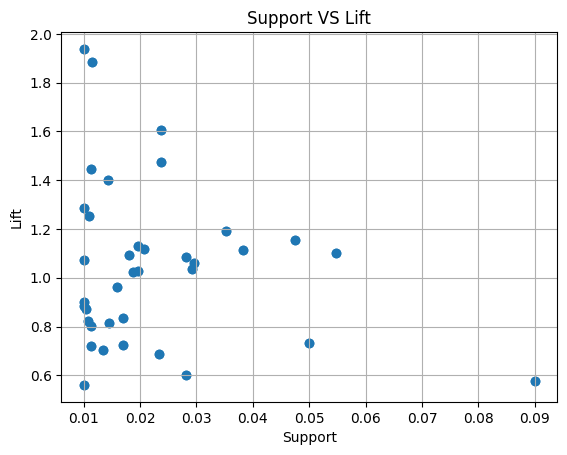

In [13]:
plt.scatter(rules['support'] , rules['lift'])
plt.xlabel("Support")
plt.ylabel("Lift")
plt.title("Support VS Lift")
plt.grid(True)
plt.show()